In [2]:
# Only bp on gains and shifts, no hebbian learning on weight matrix, to test the initial bp

In [35]:
import sys
sys.path.append("../training")
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from training_abb05_nohebb_multilayer import SimpleNeuralNetwork

In [36]:
# load the pickle file
filedir = "../weights/"
filename = "weights_abb05_nohebb_multilayer.pkl"
filepath = filedir + filename
with open(filepath, 'rb') as f:
    model = pickle.load(f)
    losses = pickle.load(f)
    gain_changes_0 = pickle.load(f)
    shift_changes_0 = pickle.load(f)
    gains_0 = pickle.load(f)
    shifts_0 = pickle.load(f)
    
    gain_changes_1 = pickle.load(f)
    shift_changes_1 = pickle.load(f)
    gains_1 = pickle.load(f)
    shifts_1 = pickle.load(f)

epochs = len(losses)

In [37]:
ndata = 200
xs = torch.linspace(0, 2 * torch.pi, ndata)
ys = torch.cos(xs)/4 + 0.5
print(len(range(epochs)),len(losses))

100 100


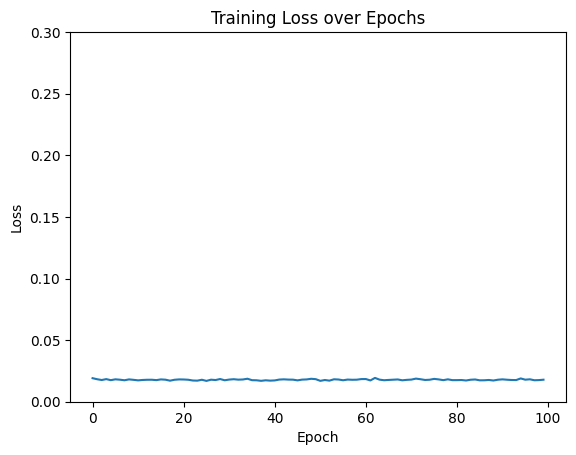

In [38]:
# Plotting the loss
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.yscale("log")
plt.ylim([0,0.3])
plt.title('Training Loss over Epochs')
# plt.savefig('abb05_loss.png')
plt.show()

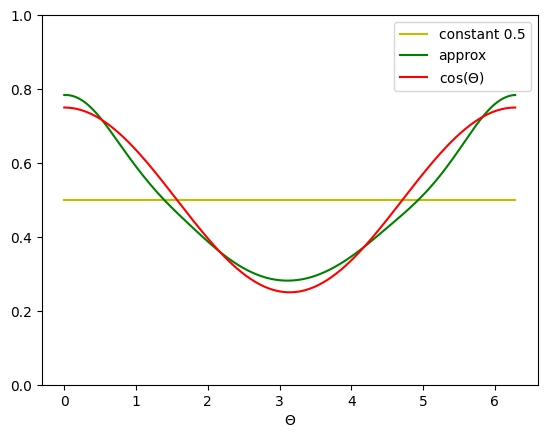

In [39]:
# Plotting the outputs
model.eval()
outputs = []
z = np.cos(xs)/4+0.5
y = [0.5 for _ in xs]

for x in xs:
    output = model(x)
    outputs.append(output.item())

plt.plot(xs, y, color='y', label='constant 0.5')
plt.plot(xs, outputs, color='g', label='approx')
plt.plot(xs, z, color='r', label='cos($\Theta$)')

plt.ylim([0,1])
plt.xlabel("$\Theta$")
# plt.savefig('abb05_outputs.png')

plt.legend() 
plt.show()

100


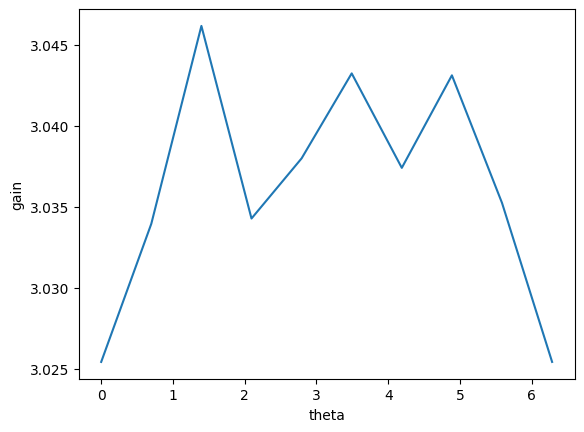

In [40]:
final_gain_0 = gains_0[-1]
print(len(gains_0))

plt.plot(np.linspace(0, 2 * np.pi, model.input_sizes[0]), final_gain_0.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("gain")
# plt.savefig('abb05_ws.png')
plt.show()

100


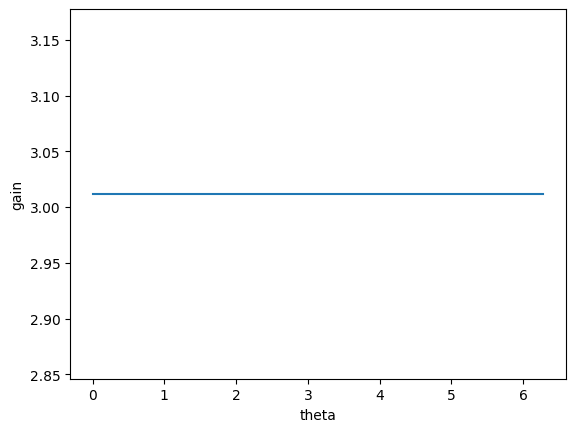

In [41]:
final_gain_1 = gains_1[-1]
print(len(gains_1))
plt.plot(np.linspace(0, 2 * np.pi, model.input_sizes[0]), final_gain_1.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("gain")
# plt.savefig('abb05_ws.png')
plt.show()

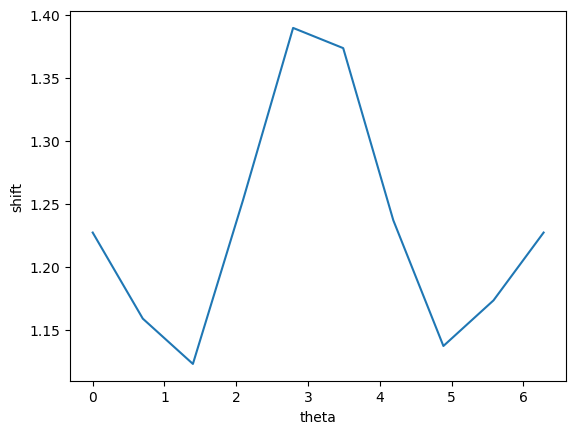

In [42]:
final_shift_0 = shifts_0[-1]
plt.plot(np.linspace(0, 2 * np.pi, model.input_sizes[0]), final_shift_0.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("shift")
# plt.savefig('abb05_ws.png')
plt.show()

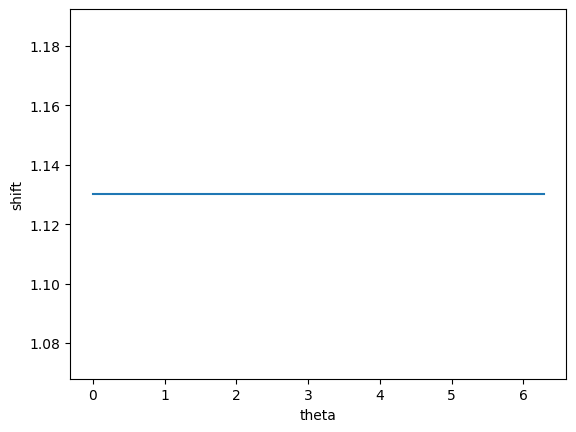

In [43]:
final_shift_1 = shifts_1[-1]
plt.plot(np.linspace(0, 2 * np.pi, model.input_sizes[0]), final_shift_1.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("shift")
# plt.savefig('abb05_ws.png')
plt.show()

In [44]:
rates = []
for x in xs:
    # guassian_rf currently matches the number of inputs only
    input = model.gaussian_rf(x)
    rate = model.activation_func(model.gain[0] * (input - model.shift[0]))
    rates.append(rate)
rates = torch.cat(rates, dim=1)
rates = rates.detach().numpy().round(4)
print(len(rates), len(rates[0]))
rates

10 200


array([[0.3345, 0.3342, 0.3332, ..., 0.3332, 0.3342, 0.3345],
       [0.2425, 0.2522, 0.2618, ..., 0.2234, 0.2329, 0.2425],
       [0.0935, 0.0979, 0.1026, ..., 0.0854, 0.0893, 0.0935],
       ...,
       [0.09  , 0.086 , 0.0822, ..., 0.0989, 0.0943, 0.09  ],
       [0.2344, 0.2251, 0.2158, ..., 0.2533, 0.2439, 0.2344],
       [0.3345, 0.3342, 0.3332, ..., 0.3332, 0.3342, 0.3345]],
      dtype=float32)

200 200


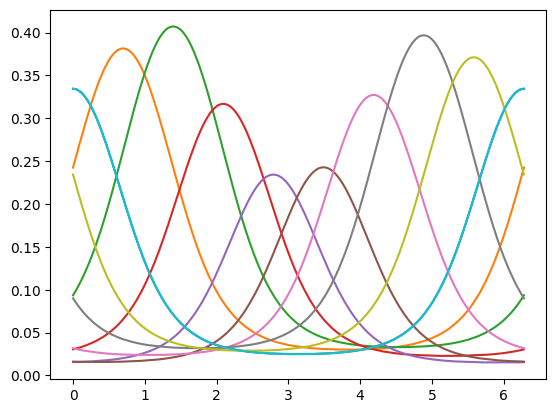

In [45]:
for i in np.arange(0,model.input_sizes[0]):
    thisr = rates[i,:]
    plt.plot(xs, thisr)
plt.show()

In [45]:
# rates = []
# print(len(model.gain[1]))
# print(len(model.shift[1]))
# for x in xs:
#     input = model.gaussian_rf(x)
#     rate = model.activation_func(model.gain[1] * (input - model.shift[1]))
#     rates.append(rate)
# rates = torch.cat(rates, dim=1)
# rates = rates.detach().numpy().round(4)
# rates

In [47]:
# for i in np.arange(0,model.input_sizes[0],10):
#     thisr = rates[i,:]
#     plt.plot(xs, thisr)
# plt.show()

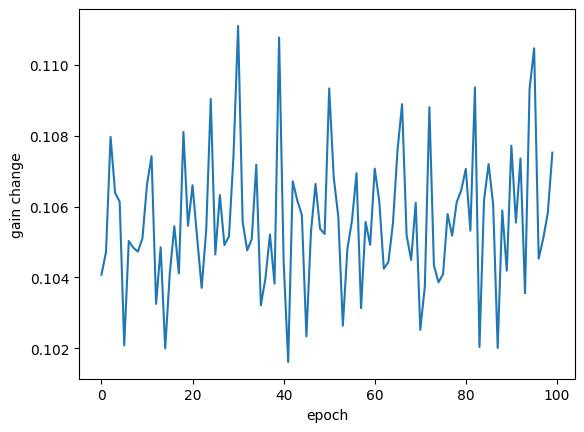

In [48]:
plt.plot(np.arange(epochs), gain_changes_0)
plt.xlabel("epoch")
plt.ylabel("gain change")
# plt.savefig('abb05_gc.png')
plt.show()

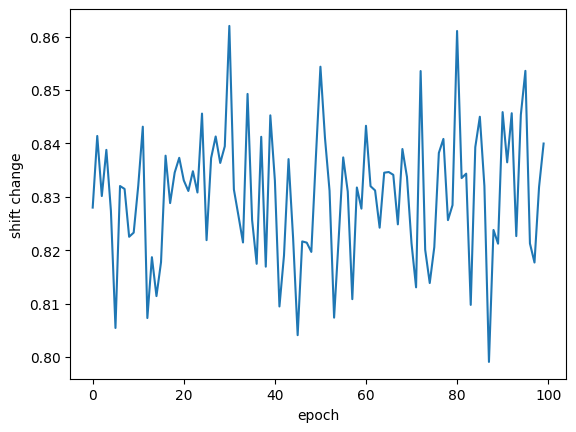

In [26]:
plt.plot(np.arange(epochs), shift_changes_0)
plt.xlabel("epoch")
plt.ylabel("shift change")
# plt.savefig('abb05_gc.png')
plt.show()